### import required library

In [26]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Read the data and show info

In [4]:
data = pd.read_csv("../Data/fruits_all/fruitNL.csv")

data.head()

,fruit,diameter,weight
0,Pumpkin,190.417208,967.882920
1,Pumpkin,60.791210,809.563941
2,Papaya,181.691953,747.056506
3,Pumpkin,112.089204,860.224142
4,Pumpkin,164.133287,934.556545


In [5]:
data.tail()

,fruit,diameter,weight
195,Papaya,52.981166,595.083647
196,Papaya,84.593050,662.483387
197,Papaya,191.625231,722.430827
198,Pumpkin,149.668555,891.924327
199,Papaya,120.840927,674.217328


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fruit     200 non-null    object 
 1   diameter  200 non-null    float64
 2   weight    200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [7]:
data.describe()

,diameter,weight
count,200.000000,200.000000
mean,104.103640,744.191041
std,51.629775,138.449807
min,10.625986,332.221699
25%,64.304065,653.229156
50%,104.243089,744.874275
75%,146.292284,868.205098
max,199.167777,977.490729


<Axes: xlabel='diameter', ylabel='weight'>

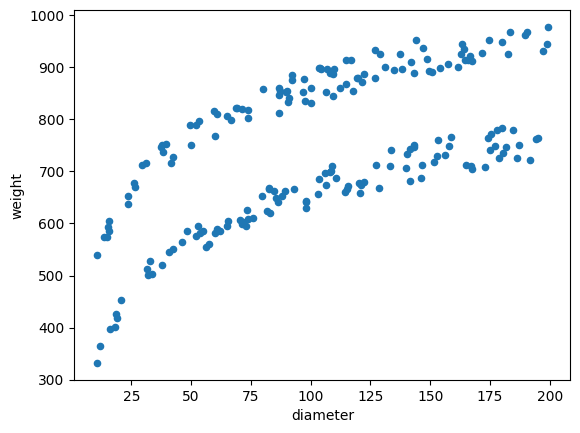

In [9]:
data.plot(kind="scatter", x="diameter", y = "weight")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

<Axes: xlabel='diameter', ylabel='weight'>

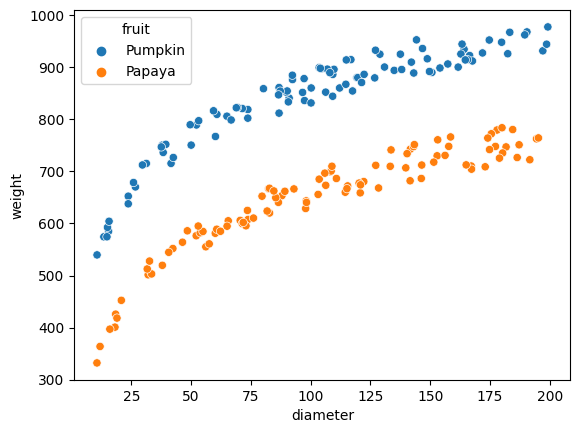

In [10]:
sns.scatterplot(data=data, x="diameter", y="weight", hue="fruit")

<Axes: >

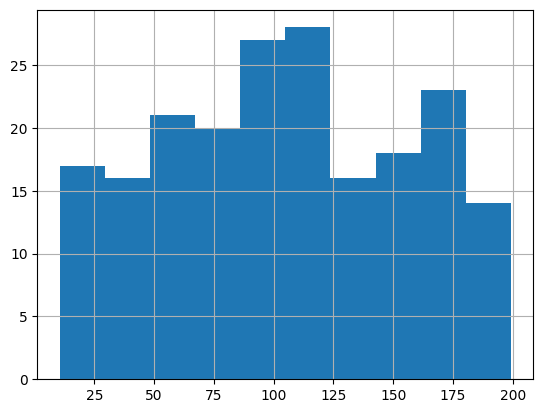

In [11]:
data.diameter.hist()

<Axes: >

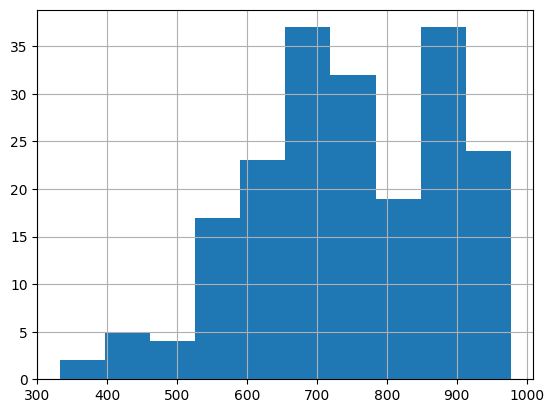

In [12]:
data.weight.hist()

#### Clustering using KMeans with 2 cluster

In [24]:
clusters_1 = KMeans(n_clusters=2).fit(data[["weight", "diameter"]])
pred_labels_kmeans = clusters_1.predict(data[["weight", "diameter"]])
print(pred_labels_kmeans)

[0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#### Visualization result 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

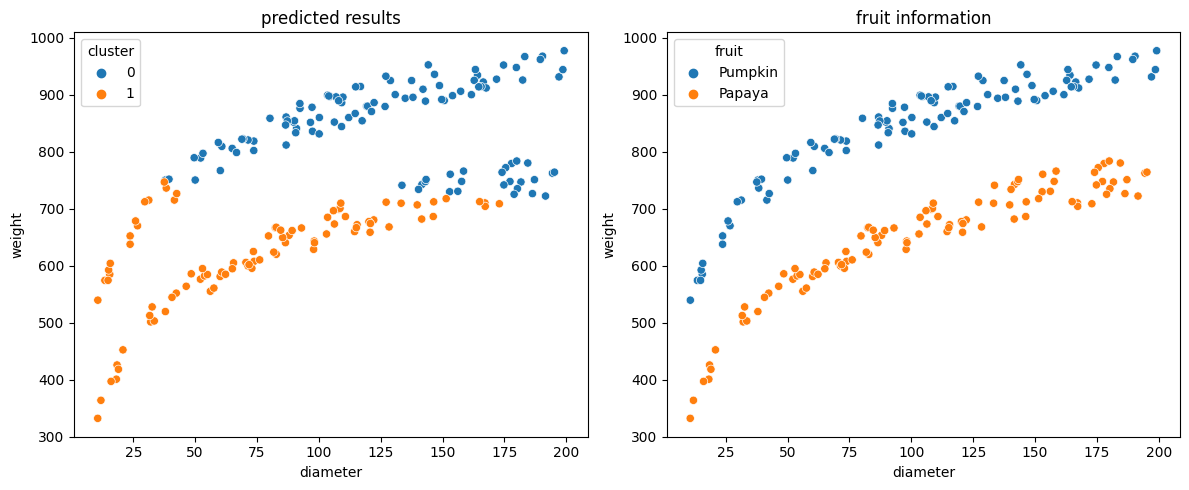

In [25]:
data_1 = data.copy()
data_1["cluster"] = pred_labels_kmeans

plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.scatterplot(data=data_1, x = "diameter", y="weight", hue="cluster")
plt.title("predicted results")
plt.subplot(122)
sns.scatterplot(data=data_1, x="diameter", y="weight", hue="fruit")
plt.title("fruit information")
plt.tight_layout()
plt.show()

### Normalize the data and retry